<a href="https://colab.research.google.com/github/Nithinps021/DeepLearning/blob/master/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import pandas as pd

In [13]:

data_path='./drive/My Drive/FAKE_NEWS_CLASSIFIER'
true_data=pd.read_csv(data_path+'/True.csv')
false_data=pd.read_csv(data_path+'/Fake.csv')
false_data['labels']=0
true_data['labels']=1
full_data =pd.concat([true_data,false_data])
full_data.reset_index(inplace=True)

In [14]:
X=full_data.drop('labels',axis=1)
Y=full_data['labels']


In [ ]:
# Data preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

In [16]:
messages=X.copy()
stemmer=WordNetLemmatizer()
titles=[]
for i in range(len(messages)):
  title=re.sub('^a-zA-Z',' ',messages['title'][i])
  title=title.lower()
  title=title.split(' ')
  title=[stemmer.lemmatize(word) for word in title if not word in stopwords.words('english')]
  title=' '.join(title)
  titles.append(title)

In [17]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [21]:
vocab_size=5000
one_hot_rep=[one_hot(words,vocab_size) for words in titles]
max_length=20
embedded_docs=pad_sequences(one_hot_rep,maxlen=max_length,padding='pre')

In [29]:
# pickling
import pickle
with open(data_path+'/embedded_doc.pickle','wb') as filX:
  pickle.dump(embedded_docs,filX)
filX.close()
with open(data_path+'/Y.pickle','wb') as filY:
  pickle.dump(Y,filY)
filY.close()


In [ ]:
# retriving pickled data
import pickle
data_path='./drive/My Drive/FAKE_NEWS_CLASSIFIER'
with open(data_path+'/embedded_doc.pickle','rb') as fil:
  embedded_docs=pickle.load(fil)
with open(data_path+'/Y.pickle','rb') as filY:
  Y=pickle.load(filY)
fil.close()
filY.close()
max_length=20
vocab_size=5000

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
X=np.array(embedded_docs)
Y=np.array(Y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
embedded_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedded_features,input_length=max_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:

history=model.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1011/1011 [==============================] - 8s 8ms/step - loss: 0.2100 - accuracy: 0.9111 - val_loss: 0.1410 - val_accuracy: 0.9435
Epoch 2/10
1011/1011 [==============================] - 8s 8ms/step - loss: 0.1115 - accuracy: 0.9568 - val_loss: 0.1290 - val_accuracy: 0.9457
Epoch 3/10
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0806 - accuracy: 0.9693 - val_loss: 0.1386 - val_accuracy: 0.9485
Epoch 4/10
1011/1011 [==============================] - 8s 7ms/step - loss: 0.0630 - accuracy: 0.9761 - val_loss: 0.1580 - val_accuracy: 0.9477
Epoch 5/10
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0470 - accuracy: 0.9829 - val_loss: 0.1754 - val_accuracy: 0.9463
Epoch 6/10
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0384 - accuracy: 0.9856 - val_loss: 0.1823 - val_accuracy: 0.9446
Epoch 7/10
1011/1011 [==============================] - 7s 7ms/step - loss: 0.0335 - accuracy: 0.9875 - val_loss: 0.2029 - val_accuracy:

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_predicted=model.predict_classes(x_test)

In [74]:
confusion_matrix(y_test,y_predicted)

array([[4457,  193],
       [ 302, 4028]])

In [75]:
accuracy_score(y_test,y_predicted)

0.9448775055679287

AttributeError: ignored

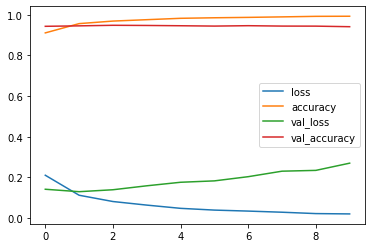

In [71]:
import matplotlib as plt

pd.DataFrame(history.history).plot()
# plt.set_ylim(0, 1) # set the vertical range to [0.01-0.1]
plt.grid(True)
plt.show()